<font size = 5, color = 'indianred'>**Refactor the code using Pytorch's nn.Module.** 

In [1]:
import torch
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.set_printoptions(precision=4, sci_mode=False)

# <font color = 'pickle'>**. Regression using PyTorch's nn.Module**</font>

Imagine that you're trying to figure out relationship between two variables x and y . You have some idea but you aren't quite sure yet whether the dependence is linear or quadratic. 

Your goal is to use least mean squares regression to identify the coefficients for the following three models using. The three models are:

1. Quadratic model where $\mathrm{y} = b + w_1 \cdot \mathrm{x} + w_2 \cdot \mathrm{x}^2$.
1. Linear model where $\mathrm{y} = b + w_1 \cdot \mathrm{x}$.
1. Linear model with no bias  where $\mathrm{y} = w_1 \cdot \mathrm{x}$.

- You will use batch gradient descent to estimate the model co-efficients. Batch gradient descent uses complete training data at each iteration. 
- We will implement only training loop (no splitting of data in to training/validation).
- The training loop will have only one for loop. We need to iterate over whole data in each epoch. We do not need to craete batches.
- <font color = 'indianred'>**You will use Pytorch's nn.module or functions from Pytorch to refactor the code below**

## <font color = 'pickle'> **Data**

In [3]:
x = torch.tensor([1.5420291, 1.8935232, 2.1603365, 2.5381863, 2.893443, \
                    3.838855, 3.925425, 4.2233696, 4.235571, 4.273397, \
                    4.9332876, 6.4704757, 6.517571, 6.87826, 7.0009003, \
                    7.035741, 7.278681, 7.7561755, 9.121138, 9.728281])
y = torch.tensor([63.802246, 80.036026, 91.4903, 108.28776, 122.781975, \
                    161.36314, 166.50816, 176.16772, 180.29395, 179.09758, \
                    206.21027, 272.71857, 272.24033, 289.54745, 293.8488, \
                    295.2281, 306.62274, 327.93243, 383.16296, 408.65967])

In [4]:
y = y.view(-1, 1)
x = x.view(-1, 1)
x2 = x*x

In [5]:
x_combined = torch.cat((x, x2), dim = 1)

In [6]:
print(x_combined.shape, x.shape)

torch.Size([20, 2]) torch.Size([20, 1])


In [15]:
def train(x, y, epochs, log_interval, loss_function, model, optimizer):
    for epoch in range(epochs):
        ypred = model(x)
        batch_loss = loss_function(ypred, y)
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
        if(epoch % log_interval ==0):
            print(f'epoch: {epoch + 1} --> loss {batch_loss.item()}')
    return (model.weight, model.bias)

# <font color = 'teal'> Solution 1

In [24]:
model = torch.nn.Linear(in_features= 2, out_features= 1, bias= True)
mse_loss = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0005)
torch.nn.init.normal_(model.weight, mean=0, std=0.01)
torch.nn.init.zeros_(model.bias)
epochs = 100000
log_interval = 10000
w,b = train(x = x_combined, y = y, epochs = epochs,
            log_interval = log_interval, loss_function = mse_loss,
            model = model, optimizer = optimizer)

epoch: 1 --> loss 57951.44921875
epoch: 10001 --> loss 5.0022053718566895
epoch: 20001 --> loss 3.0946593284606934
epoch: 30001 --> loss 2.1374642848968506
epoch: 40001 --> loss 1.6571009159088135
epoch: 50001 --> loss 1.4160594940185547
epoch: 60001 --> loss 1.2949364185333252
epoch: 70001 --> loss 1.2341089248657227
epoch: 80001 --> loss 1.203578233718872
epoch: 90001 --> loss 1.188206434249878


# <font color = 'red'> Solution 2

In [25]:
model = torch.nn.Linear(in_features= 1, out_features= 1, bias = True)
mse_loss = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
torch.nn.init.normal_(model.weight, mean=0, std=0.01)
torch.nn.init.zeros_(model.bias)
epochs = 1000
log_interval = 100
w,b = train(x = x, y = y, epochs = epochs, log_interval = log_interval, 
            loss_function = mse_loss, model = model, optimizer = optimizer)

epoch: 1 --> loss 57947.8828125
epoch: 101 --> loss 4.355788230895996
epoch: 201 --> loss 2.807051181793213
epoch: 301 --> loss 2.0118520259857178
epoch: 401 --> loss 1.6035387516021729
epoch: 501 --> loss 1.3938924074172974
epoch: 601 --> loss 1.2862393856048584
epoch: 701 --> loss 1.230964183807373
epoch: 801 --> loss 1.2025858163833618
epoch: 901 --> loss 1.188016653060913


# <font color = 'green'> Solution 3

In [19]:
model = torch.nn.Linear(in_features= 1, out_features= 1, bias = False)
mse_loss = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
torch.nn.init.normal_(model.weight, mean = 0, std = 0.01)
epochs = 10
log_interval = 1
w,b = train(x = x, y = y, epochs = epochs, log_interval = log_interval, 
            loss_function = mse_loss, model = model, optimizer = optimizer)

epoch: 1 --> loss 57925.70703125
epoch: 2 --> loss 6891.31884765625
epoch: 3 --> loss 820.7962646484375
epoch: 4 --> loss 98.70894622802734
epoch: 5 --> loss 12.817014694213867
epoch: 6 --> loss 2.6001851558685303
epoch: 7 --> loss 1.384917974472046
epoch: 8 --> loss 1.2403569221496582
epoch: 9 --> loss 1.2231651544570923
epoch: 10 --> loss 1.2211220264434814


## <font color = 'pickle'> **Utility Functions**

### <font color = 'pickle'>**Model Linear Regression**

In [7]:
def linear_reg(x, w, b, bias):
  if bias: 
    return torch.mm(x, w.T) + b
  else: 
    return torch.mm(x, w.T)

### <font color = 'pickle'>**Loss Function**

In [8]:
def mse_loss(y, yhat):
  error = yhat - y
  sum_square_loss = error.T@error
  return sum_square_loss/len(y)

### <font color = 'pickle'> **Gradient Linear Regression**

In [ ]:
def lin_grad(x, y, y_hat, bias= True):
  error = y_hat - y
  w_grad = 2 * torch.mm(x.T, error)/ len(y) # shape is (x.shape[-1], n_outs) 
  if bias:
    b_grad = 2 * error.sum() /len(y)
    return (w_grad.T, b_grad)
  else:
    return w_grad.T  # reshape to  (n_outs, x.shape[-1]) 

### <font color = 'pickle'> **Optimizer**

In [10]:
def sgd_step(params, param_grads, learning_rate):
  with torch.no_grad:
    for param, param_grad in zip(params, param_grads):
      param -= learning_rate*param_grad

### <font color = 'pickle'> **Train Function**

In [ ]:
def train(epochs, x, y, n_outs, bias, loss_function, log_interval, learning_rate):
  loss_epoch = []
  n_ins = x.shape[-1]
  w = torch.normal(0, 0.01, size=(n_outs, n_ins), requires_grad=False)
  b = torch.zeros(n_outs, requires_grad=False)
  if bias:
    params = (w, b)
  else:
    params = w

  for epoch in range(epochs):
    
    # Step1: forward pass
    y_hat = linear_reg(x, w, b, bias)

    # Step2 : Loss
    loss = loss_function(y_hat, y)

    # Calculate Gradients
    param_grads = lin_grad(x, y, y_hat, bias)

    # update parameters
    sgd_step(params, param_grads, learning_rate)  

    if(epoch % log_interval ==0):
      print(f'epoch: {epoch + 1} --> loss {loss.item()}')

  return (w, b)
  
 

## <font color = 'pickle'> **Solution 7(1)**

In [ ]:
# model 1  
loss_function = mse_loss
LEARNING_RATE = 0.0005
EPOCHS = 100000
LOG_INTERVAL= 10000
N_OUTS = 1
BIAS = True

w1, b1 = train(EPOCHS, x_combined, y,  N_OUTS, BIAS, loss_function, LOG_INTERVAL, LEARNING_RATE)

epoch: 1 --> loss 57903.66796875
epoch: 10001 --> loss 5.002894401550293
epoch: 20001 --> loss 3.0949909687042236
epoch: 30001 --> loss 2.1376147270202637
epoch: 40001 --> loss 1.657187819480896
epoch: 50001 --> loss 1.4160882234573364
epoch: 60001 --> loss 1.294940710067749
epoch: 70001 --> loss 1.2341119050979614
epoch: 80001 --> loss 1.203588604927063
epoch: 90001 --> loss 1.1882057189941406


In [ ]:
print(f' Weights {w1}, \nBias: {b1}')

 Weights tensor([[   41.7964,     0.0148]]), 
Bias: tensor([0.9773])


## <font color = 'pickle'> **Solution 7(2)**

In [ ]:
# model 2
loss_function = mse_loss
LEARNING_RATE = 0.01
EPOCHS = 1000
LOG_INTERVAL= 100
N_OUTS = 1
BIAS = True

w2, b2 = train(EPOCHS, x, y,  N_OUTS, BIAS, loss_function, LOG_INTERVAL, LEARNING_RATE)

epoch: 1 --> loss 57931.5234375
epoch: 101 --> loss 4.354783535003662
epoch: 201 --> loss 2.8065648078918457
epoch: 301 --> loss 2.011599540710449
epoch: 401 --> loss 1.6034103631973267
epoch: 501 --> loss 1.39381742477417
epoch: 601 --> loss 1.2862085103988647
epoch: 701 --> loss 1.2309536933898926
epoch: 801 --> loss 1.2025779485702515
epoch: 901 --> loss 1.1880155801773071


In [ ]:
print(f' Weights {w2}, \nBias: {b2}')

 Weights tensor([[41.9377]]), 
Bias: tensor([0.7467])


## <font color = 'pickle'> **Solution 7(3)**

In [ ]:
# model 2
loss_function = mse_loss
LEARNING_RATE = 0.01
EPOCHS = 10
LOG_INTERVAL= 1
N_OUTS = 1
BIAS = False

w3, b3 = train(EPOCHS, x, y,  N_OUTS, BIAS, loss_function, LOG_INTERVAL, LEARNING_RATE)

epoch: 1 --> loss 57931.64453125
epoch: 2 --> loss 6892.0234375
epoch: 3 --> loss 820.8787231445312
epoch: 4 --> loss 98.71884155273438
epoch: 5 --> loss 12.81818962097168
epoch: 6 --> loss 2.600346088409424
epoch: 7 --> loss 1.3849306106567383
epoch: 8 --> loss 1.2403569221496582
epoch: 9 --> loss 1.2231652736663818
epoch: 10 --> loss 1.2211220264434814


In [ ]:
print(f' Weights {w3}, \nBias: {b3}')

 Weights tensor([[42.0557]]), 
Bias: tensor([0.])


## <font color = 'pickle'> **Plot Predictions**

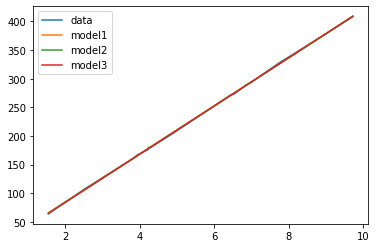

In [ ]:
plt.plot(x.numpy(), y.numpy(), label='data')
plt.plot(x.numpy(), (linear_reg(x_combined, w1, b1, bias=True)).numpy(), label='model1')
plt.plot(x.numpy(), (linear_reg(x, w2, b2, bias=True)).numpy(), label='model2')
plt.plot(x.numpy(), (linear_reg(x, w3, b3, bias=False)).numpy(), label='model3')
plt.legend()
plt.show()
